# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [3]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [4]:
# Importing the file porter_data_1.csv
df_porter = pd.read_csv("porter_data_1.csv")
df_porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [5]:
print(df_porter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [6]:
print(df_porter.describe())

           market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924    

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [7]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df_porter['created_at'] = pd.to_datetime(df_porter['created_at'])
df_porter['actual_delivery_time'] = pd.to_datetime(df_porter['actual_delivery_time'])



##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [8]:
# Convert categorical features to category type

categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
df_porter[categorical_cols] = df_porter[categorical_cols].astype('category')

print(df_porter[categorical_cols].dtypes)

market_id                 category
store_primary_category    category
order_protocol            category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [9]:
# Calculate time taken in minutes
df_porter['time_taken'] = (df_porter['actual_delivery_time'] - df_porter['created_at']).dt.total_seconds() / 60

# hour and day from created_at column
df_porter['hour'] = df_porter['created_at'].dt.hour
df_porter['day'] = df_porter['created_at'].dt.day_name()

df_porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour       day  
0                      21.0     34.44        47.0    22    Friday  
1                       2.0     27.60        44.0    21   Tuesday  
2                      18.0     11.56        55.0     0    Monday  
3                       8.0     31.80        59.0     3  Thursday  
4                       7.0      8.20        46.0     2   Tuesday

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [10]:
# Extract the hour and day of week from the 'created_at' timestamp

df_porter['hour'] = df_porter['created_at'].dt.hour
df_porter['day_of_week'] = df_porter['created_at'].dt.day_name()


# Create a categorical feature 'isWeekend'

df_porter['isweekend'] = df_porter['day_of_week'].apply(lambda x: 'Yes' if x in ['Saturday', 'Sunday'] else 'No')

# Check result
print(df_porter[['created_at', 'hour', 'day_of_week', 'isweekend']].head())

           created_at  hour day_of_week isweekend
0 2015-02-06 22:24:17    22      Friday        No
1 2015-02-10 21:49:25    21     Tuesday        No
2 2015-02-16 00:11:35     0      Monday        No
3 2015-02-12 03:36:46     3    Thursday        No
4 2015-01-27 02:12:36     2     Tuesday        No


In [11]:
# Drop unnecessary columns
df_porter = df_porter.drop(['created_at', 'actual_delivery_time', 'day'], axis=1)

# Check
df_porter.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  hour  \
0                14.0                      21.0     34.44        47.0    22   
1                 2.0                       2.0     27.60        44.0    21   
2                 6.0                      18.0     11.56        55.0     0   
3                 6.0                       8.0     31.80        59.0     3   
4                 5.0                       7.0      8.20        46.0     2   

  day_of_week isweekend  
0      Friday        No  
1     Tuesday        No  
2      Monday        No  
3    Thursday        No  
4     Tuesday        No

In [13]:
df_porter.shape

(175777, 16)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [14]:
# Define target variable (y) and features (X)

y = df_porter['time_taken']
X = df_porter.drop(columns=['time_taken']) 

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

Train Shape: (123043, 15) (123043,)
Test Shape: (52734, 15) (52734,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [16]:
df_porter.dtypes

market_id                   category
store_primary_category      category
order_protocol              category
total_items                    int64
subtotal                       int64
num_distinct_items             int64
min_item_price                 int64
max_item_price                 int64
total_onshift_dashers        float64
total_busy_dashers           float64
total_outstanding_orders     float64
distance                     float64
time_taken                   float64
hour                           int32
day_of_week                   object
isweekend                     object
dtype: object

In [21]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = [
    'total_items', 
    'subtotal', 
    'num_distinct_items', 
    'min_item_price', 
    'max_item_price', 
    'total_onshift_dashers', 
    'total_busy_dashers', 
    'total_outstanding_orders', 
    'distance', 
    'time_taken', 
    'hour'
]

# Categorical columns
categorical_cols = [
    'isweekend', 'day_of_week'
] 



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

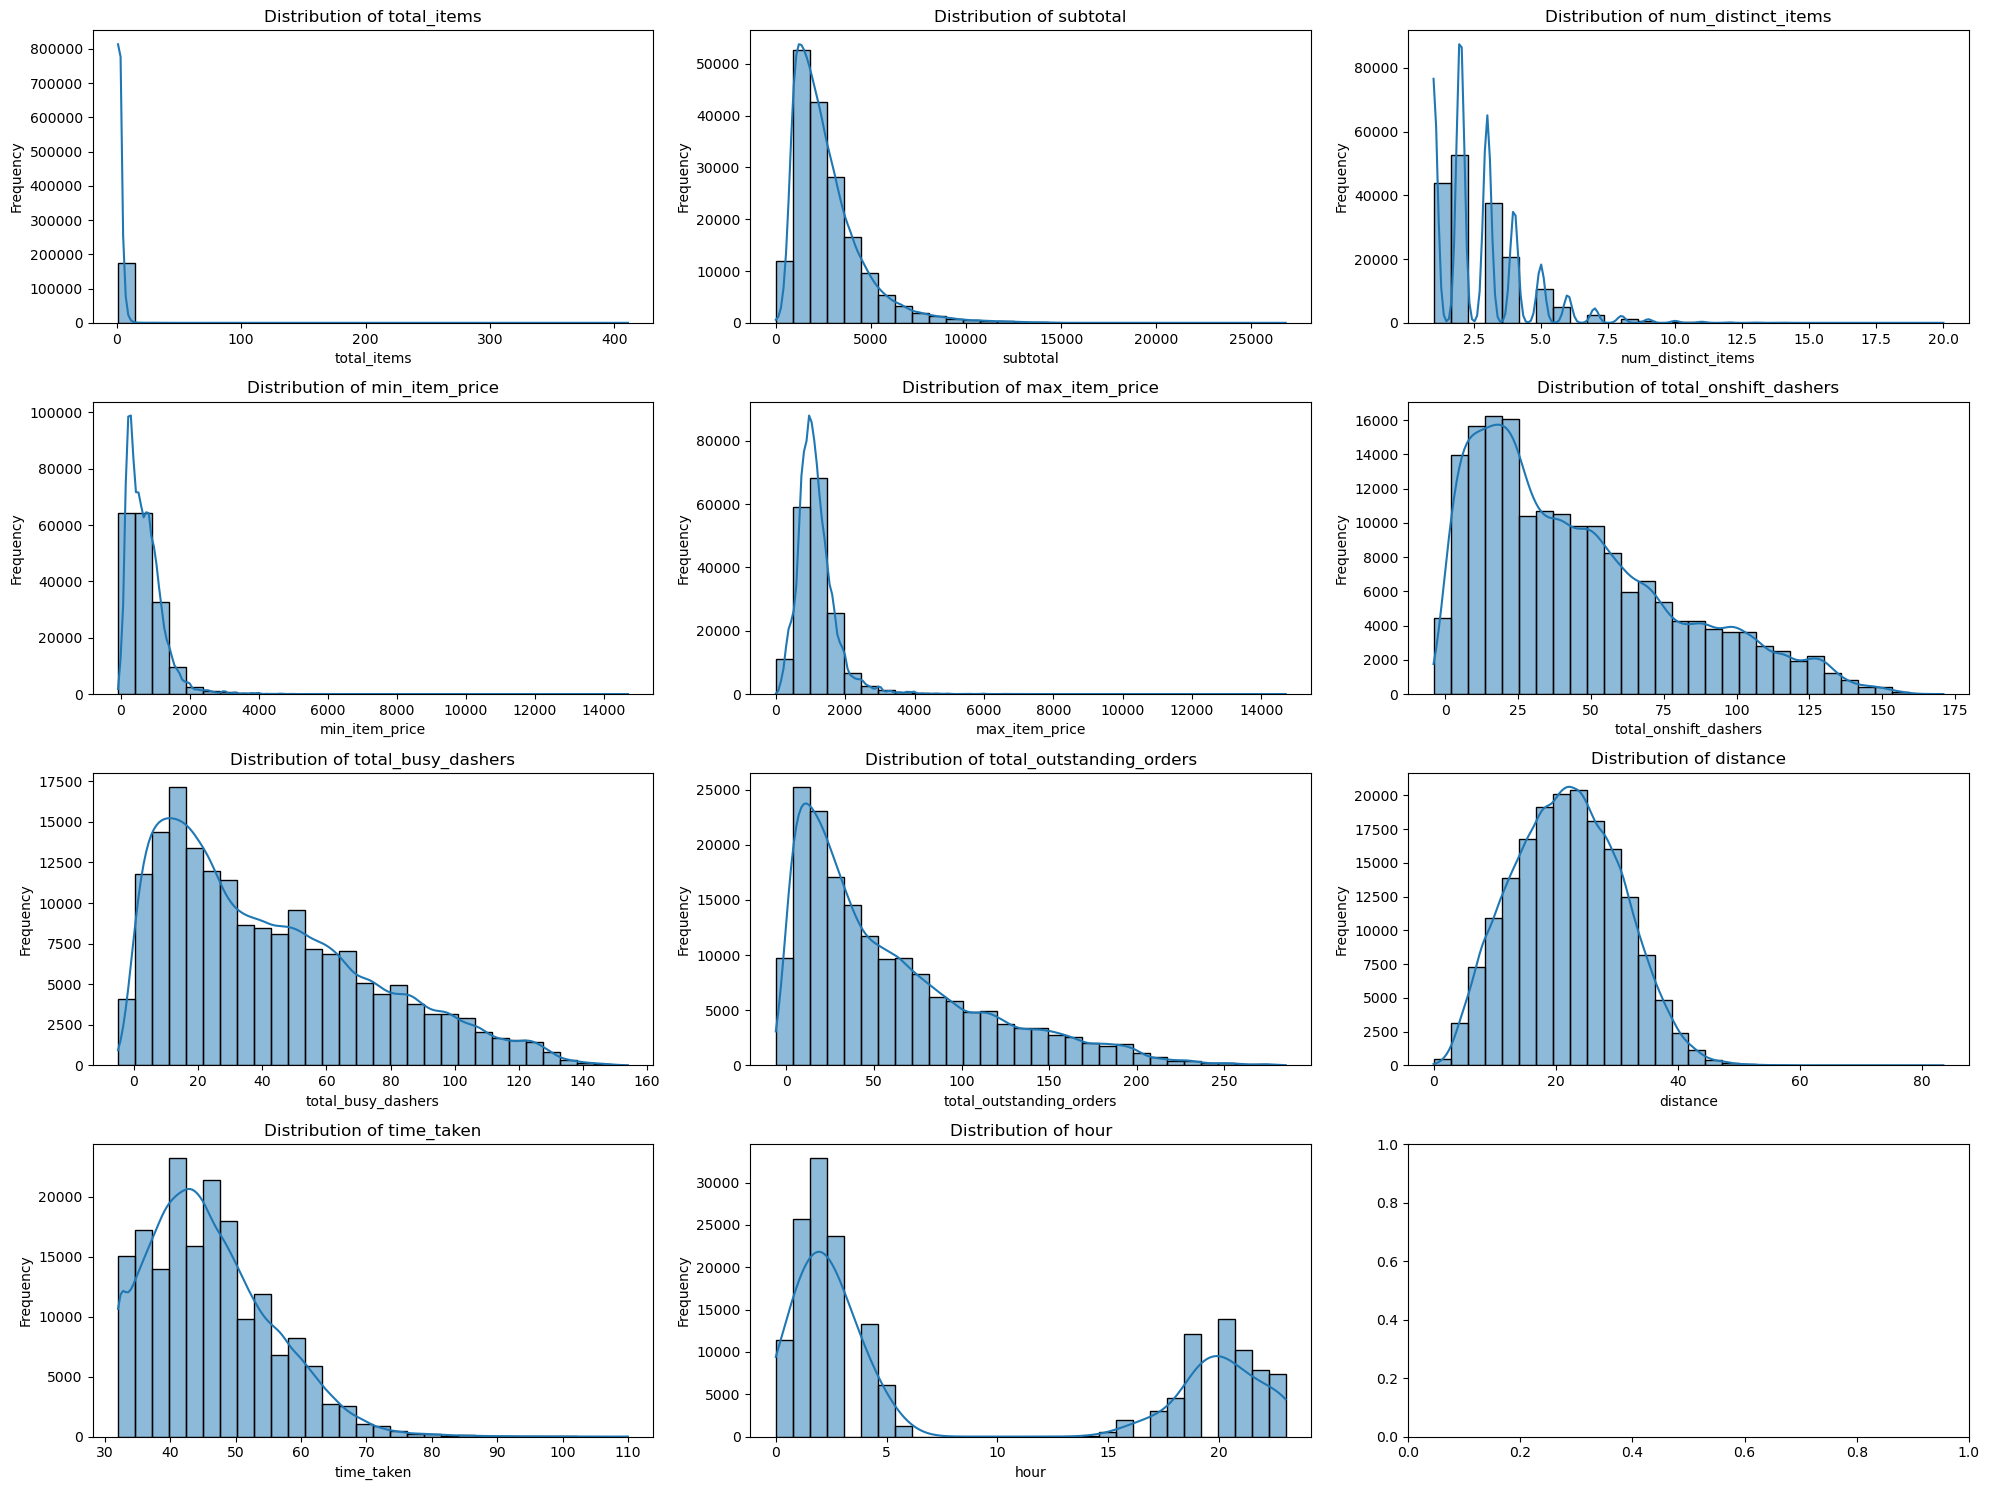

In [22]:
# Plot distributions for all numerical columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))  # Create subplots for numerical columns
axes = axes.flatten()  # Flatten the axes array for easy indexing
for i, col in enumerate(numerical_cols):
    sns.histplot(df_porter[col], bins=30, kde=True, ax=axes[i])  # Plot histogram with KDE for each numerical column
    axes[i].set_title(f'Distribution of {col}')  # Set title for each subplot
    axes[i].set_xlabel(col)  # Set x-label for each subplot
    axes[i].set_ylabel('Frequency')  # Set y-label for each subplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show() 

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

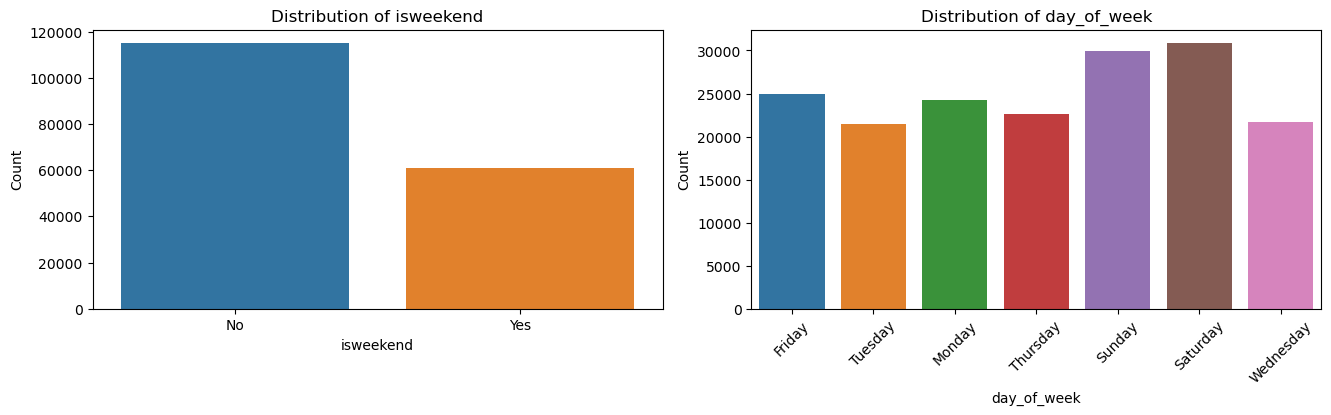

In [23]:
# Distribution of categorical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.countplot(data=X, x=col)  # Plot count of each category
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [24]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(y, bins=30, kde=True)  # Plot histogram with KDE for the target variable
plt.title('Distribution of Time Taken')  # Set title for the plot
plt.xlabel('Time Taken (minutes)')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.show()  # Show the plot

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

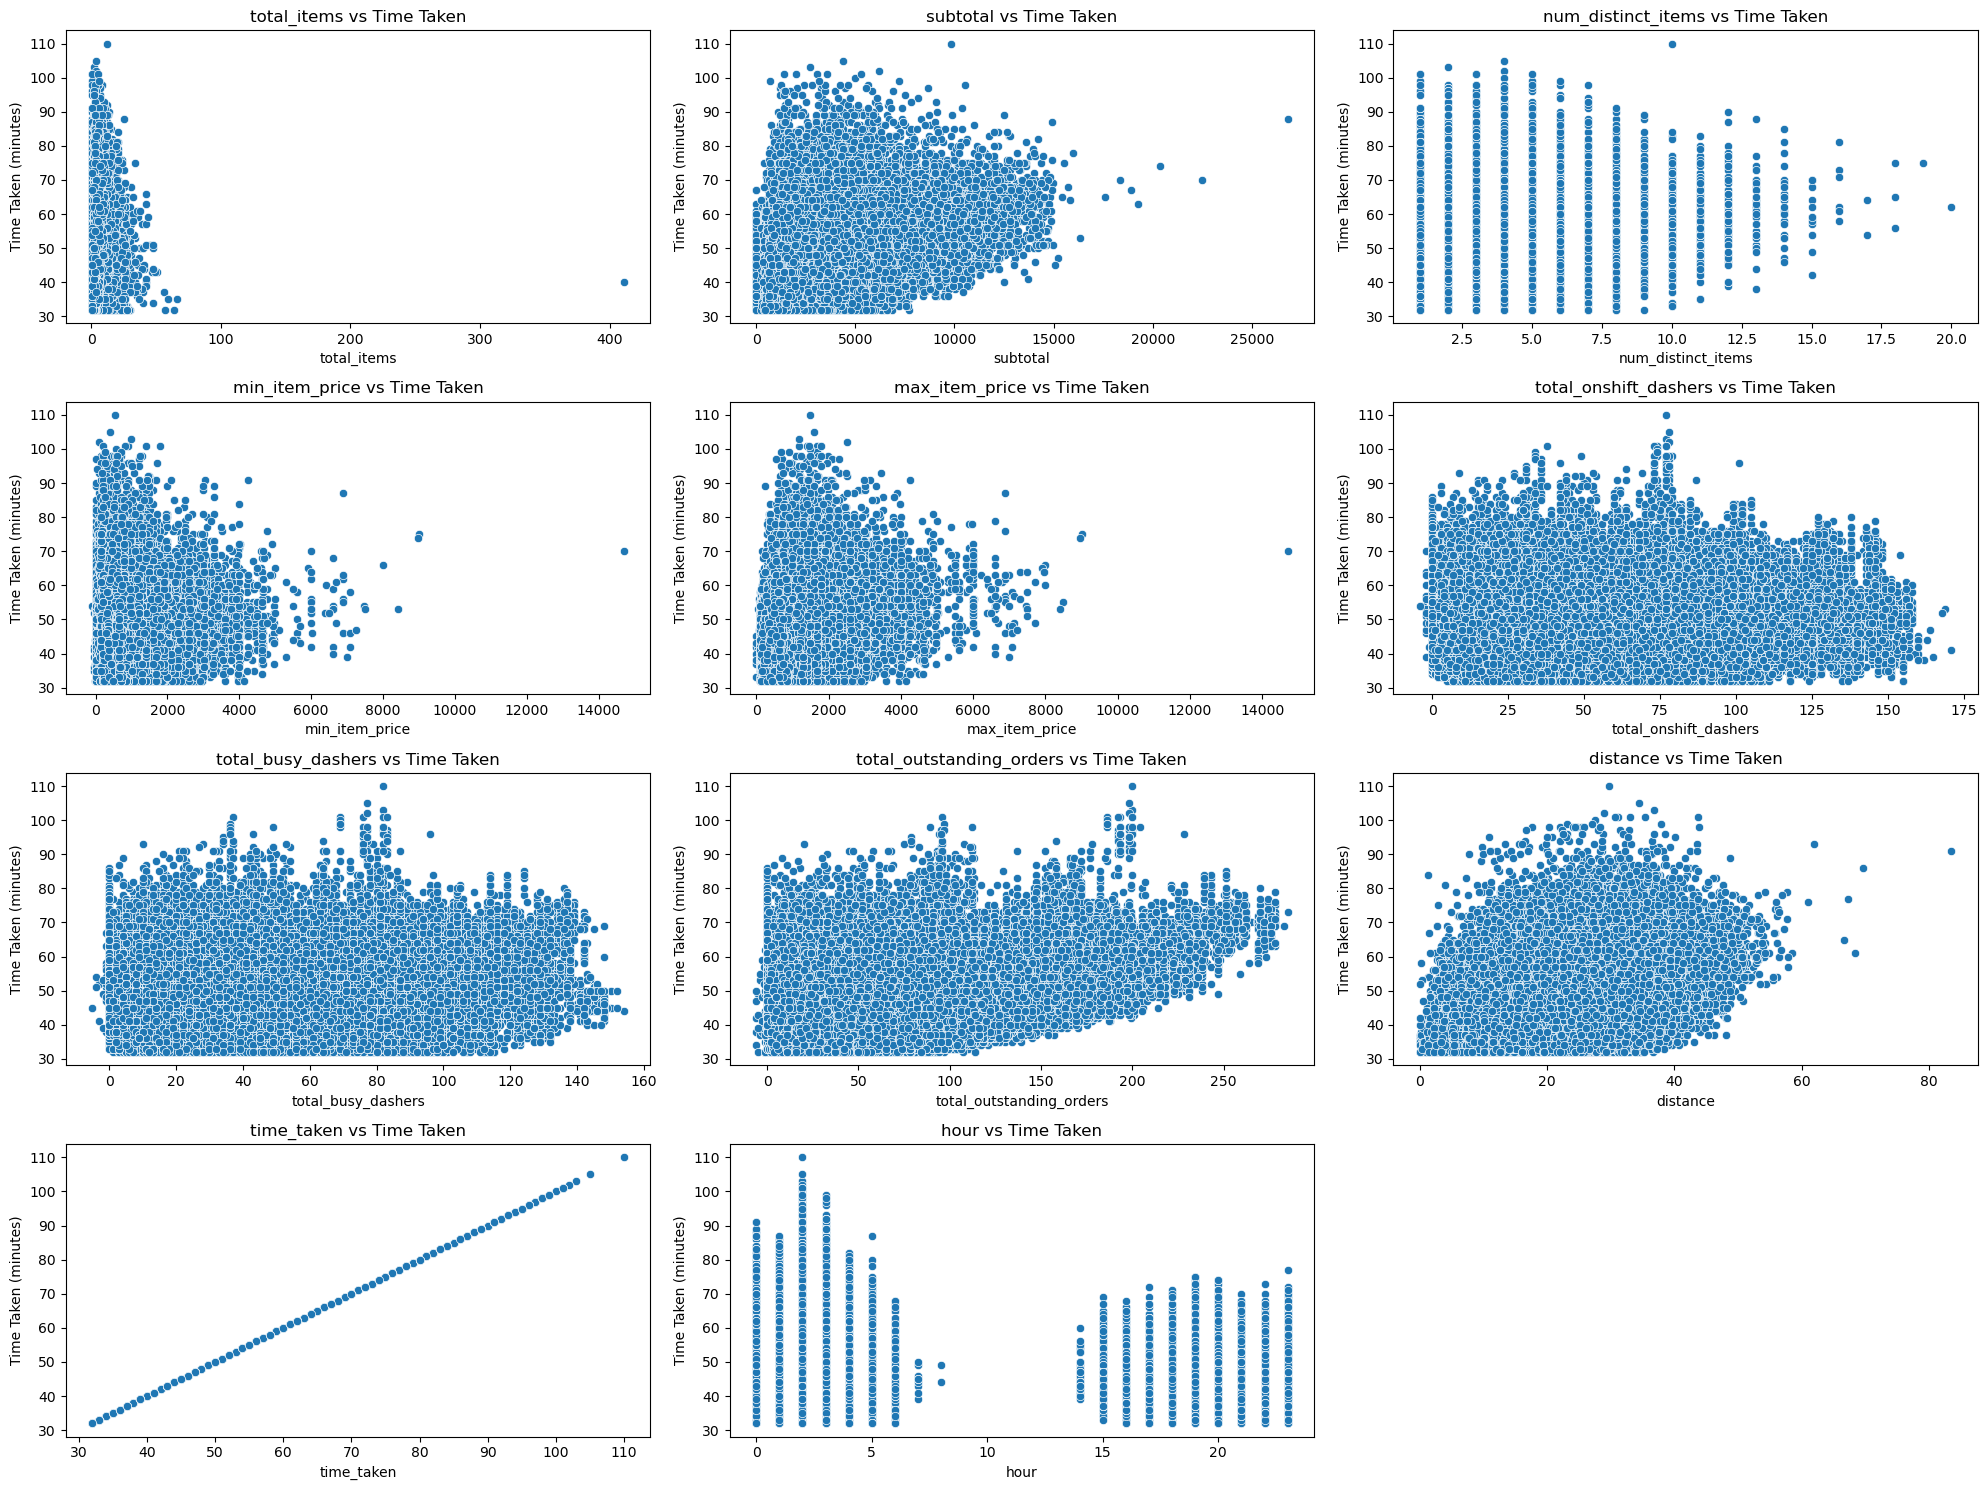

In [25]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 15))  # Set figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.scatterplot(data=df_porter, x=col, y='time_taken')  # Plot scatter plot for each numerical column against time_taken
    plt.title(f'{col} vs Time Taken')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Time Taken (minutes)')  # Set y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots

In [26]:
# Show the distribution of time_taken for different hours

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to show distribution of time_taken across hours
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_porter, x='hour', y='time_taken')
plt.title('Distribution of Delivery Time Across Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=0)
plt.show()

# Calculate mean time taken per hour
mean_time_by_hour = df_porter.groupby('hour')['time_taken'].agg(['mean', 'count']).round(2)
print("\
Mean delivery time and order count by hour:")
print(mean_time_by_hour)

Mean delivery time and order count by hour:
       mean  count
hour              
0     46.36  11464
1     47.69  25722
2     50.69  32896
3     50.18  23693
4     45.96  13248
5     44.35   6078
6     45.05   1223
7     44.67      9
8     46.50      2
14    46.29     38
15    45.33    502
16    44.15   1936
17    43.61   3058
18    42.40   4514
19    43.53  12083
20    41.65  13883
21    40.15  10219
22    40.70   7875
23    41.33   7334


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [27]:
# Plot the heatmap of the correlation matrix

# Calculate the correlation matrix for numerical columns
correlation_matrix = df_porter[numerical_cols].corr()  # Calculate correlation matrix for numerical columns
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Plot heatmap with annotations
plt.title('Correlation Matrix')  # Set title for the heatmap
plt.show()  # Show the heatmap

# Print correlations with time_taken specifically
time_taken_corr = correlation_matrix['time_taken'].sort_values(ascending=False)
print("\
Correlations with time_taken:")
print(time_taken_corr)

Correlations with time_taken:
time_taken                  1.000000
distance                    0.460173
subtotal                    0.413267
total_outstanding_orders    0.384999
num_distinct_items          0.312055
max_item_price              0.255167
total_items                 0.224856
total_busy_dashers          0.206045
total_onshift_dashers       0.171015
min_item_price              0.022753
hour                       -0.346366
Name: time_taken, dtype: float64


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [28]:
# Drop 3-5 weakly correlated columns from training dataset
X_train.drop(columns=['hour', 'min_item_price'], inplace=True)  

X_train.head()


market_id store_primary_category order_protocol  total_items  subtotal  \
94746        4.0                     24            5.0            2      1790   
173338       4.0                     72            5.0            1       845   
37592        4.0                     55            5.0            1      1900   
42763        2.0                     28            4.0            6       463   
27506        2.0                     72            1.0            3      3500   

        num_distinct_items  max_item_price  total_onshift_dashers  \
94746                    2             995                   10.0   
173338                   1             795                  134.0   
37592                    1            1200                   21.0   
42763                    3             299                   98.0   
27506                    3            1200                    7.0   

        total_busy_dashers  total_outstanding_orders  distance day_of_week  \
94746                  9.0                      15.0     18.04      Monday   
173338                76.0                     136.0     24.28    Saturday   
37592                 21.0                      28.0     28.24      Sunday   
42763                 87.0                     129.0     13.88    Saturday   
27506                 13.0                      17.0      8.00    Saturday   

       isweekend  
94746         No  
173338       Yes  
37592        Yes  
42763        Yes  
27506        Yes

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [29]:
# Boxplot for time_taken

plt.figure(figsize=(20, 15))  # Set figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.boxplot(data=df_porter, y=col)  # Plot boxplot for each numerical column
    plt.title(f'Boxplot of {col}')  # Set title for each subplot
    plt.ylabel(col)  # Set y-axis label
    plt.xlabel('')  # Set x-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [30]:
print(X_train.shape)
print(X_test.shape)  # Display the shape of the test set
print(y_train.shape)  # Display the shape of the training target variable
print(y_test.shape) 

(123043, 13)
(52734, 15)
(123043,)
(52734,)


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [31]:
# Handle outliers


def handle_outliers(df, columns):
    """
    Clips outliers in specified columns to within 1.5 * IQR range.
    Returns a new DataFrame.
    """
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Filter numerical columns that exist in X_train
existing_numerical_cols = [col for col in numerical_cols if col in X_train.columns]

# Apply the function to handle outliers in the training dataset
X_train = handle_outliers(X_train, existing_numerical_cols)  # Handle outliers in the training dataset
# Apply the function to handle outliers in the test dataset

# Check the shape of the DataFrame after handling outliers
X_train.shape  # Display the shape of the training dataset

(123043, 13)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [32]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Numerical columns (including target for analysis)
numerical_cols = [
    'total_items', 'subtotal', 'num_distinct_items', 
    'min_item_price', 'max_item_price', 'total_onshift_dashers', 
    'total_busy_dashers', 'total_outstanding_orders', 'distance', 
    'hour', 'time_taken'   # include target for EDA
]

# Categorical columns
categorical_cols = [
    'day_of_week', 'isweekend'
]


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

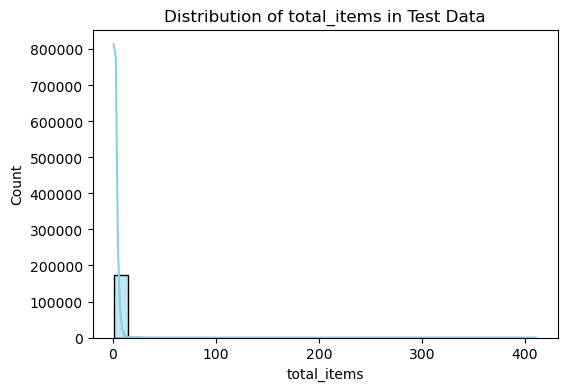

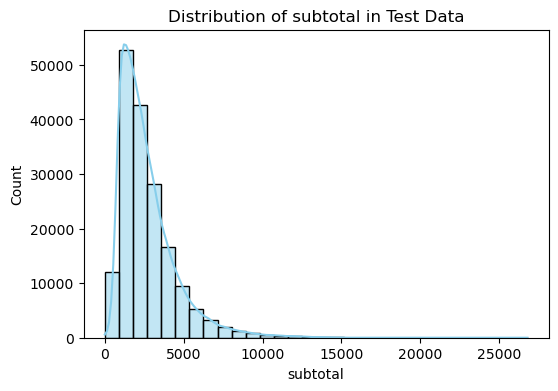

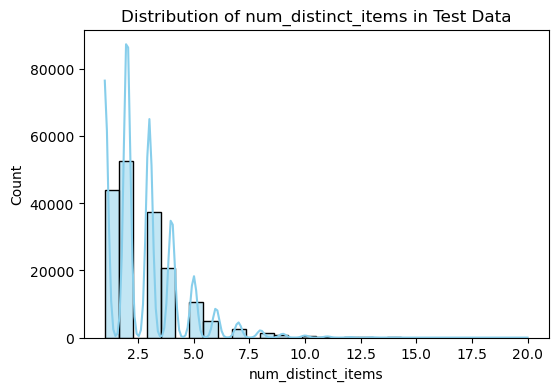

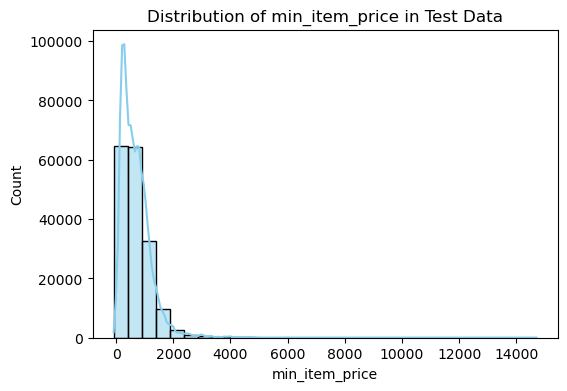

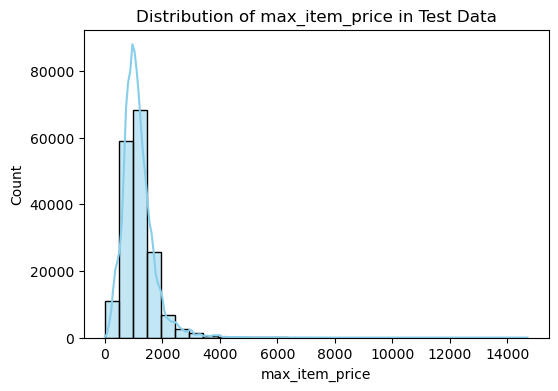

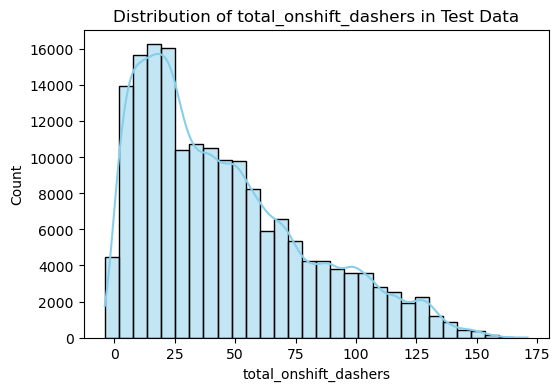

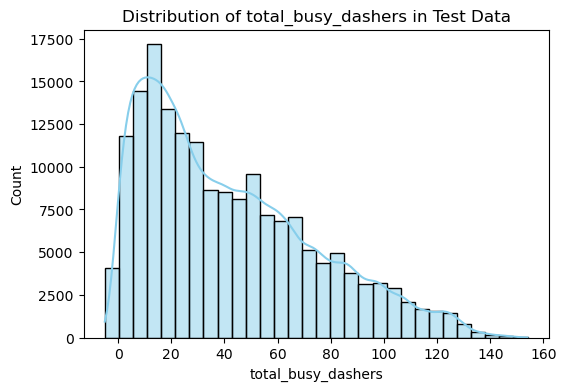

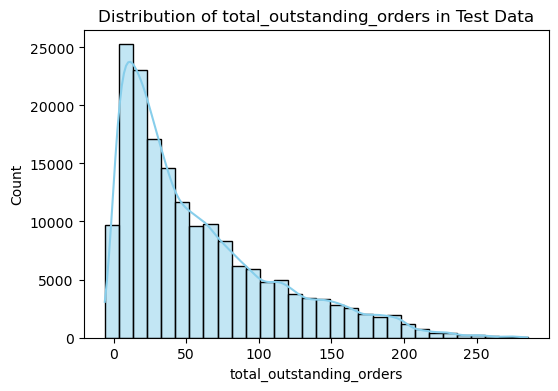

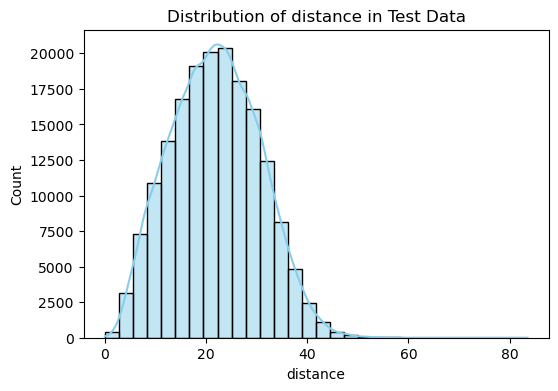

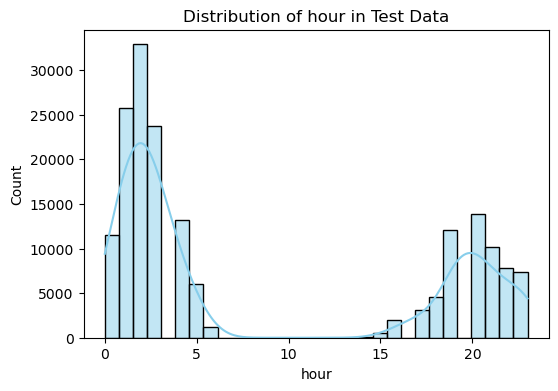

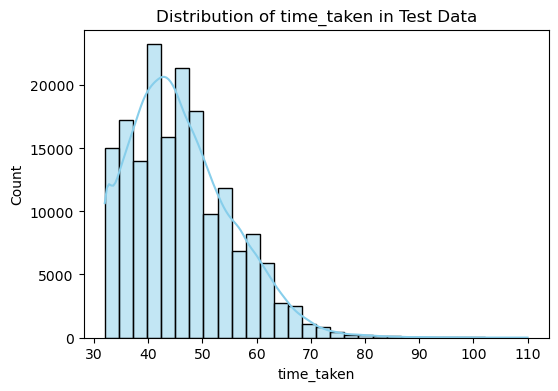

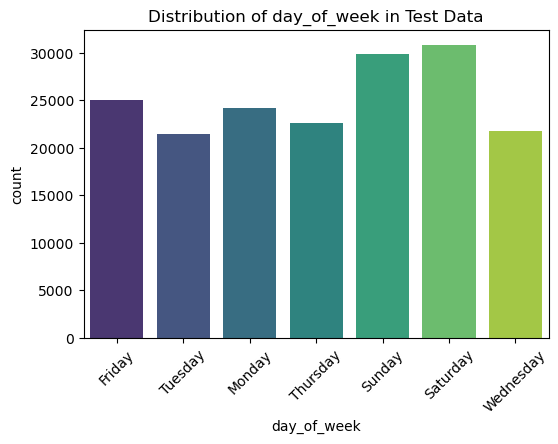

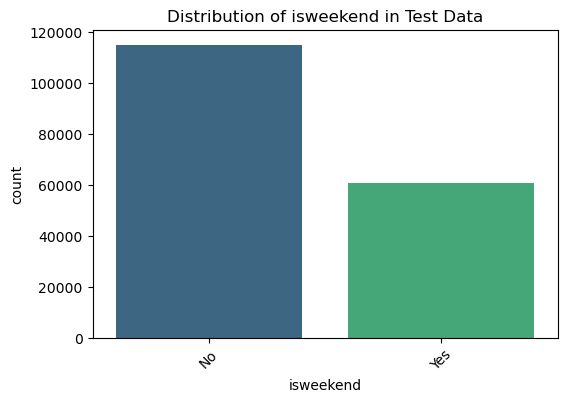

In [33]:
# Plot distributions for all numerical columns
# Example: check distribution of numerical columns in test data
for col in numerical_cols:
    if col in df_porter.columns:  # avoid errors if target not in test
        plt.figure(figsize=(6,4))
        sns.histplot(df_porter[col].dropna(), kde=True, color='skyblue', bins=30)
        plt.title(f'Distribution of {col} in Test Data')
        plt.show()

# Example: check categorical columns
for col in categorical_cols:
    if col in df_porter.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, data=df_porter, palette='viridis')
        plt.title(f'Distribution of {col} in Test Data')
        plt.xticks(rotation=45)
        plt.show()



##### **4.1.2**
Check the distribution of categorical features

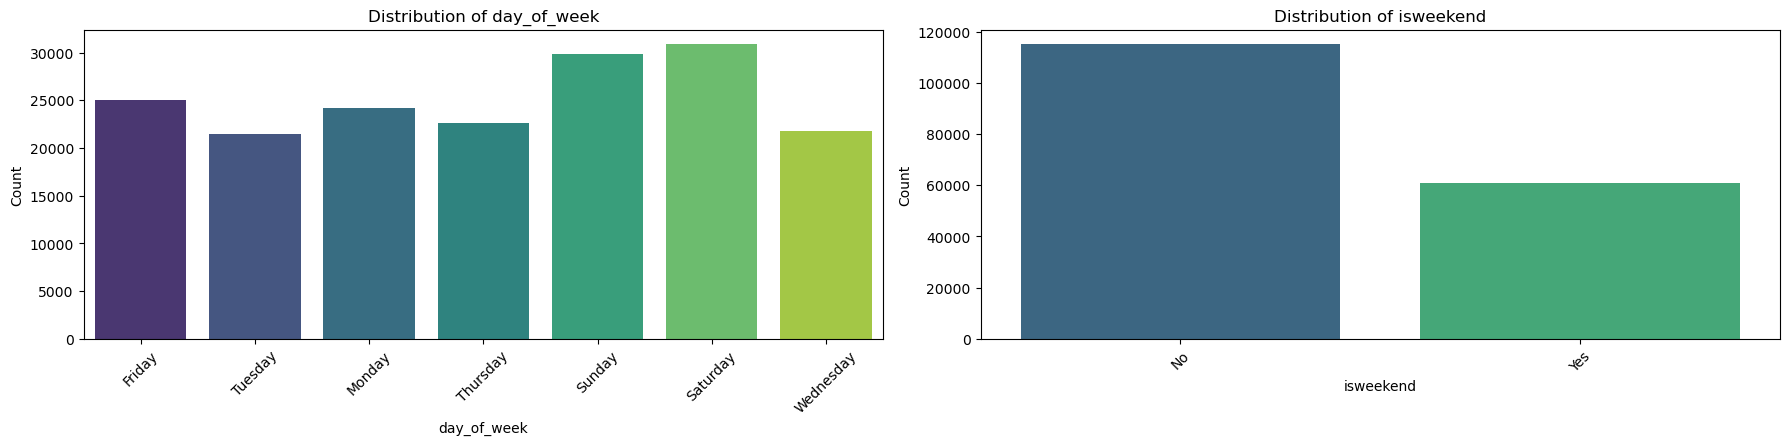

In [34]:
# Distribution of categorical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(18, 12))

# Loop through categorical columns
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)  # adjust grid size based on number of columns
    sns.countplot(x=col, data=df_porter, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # rotate labels for readability

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

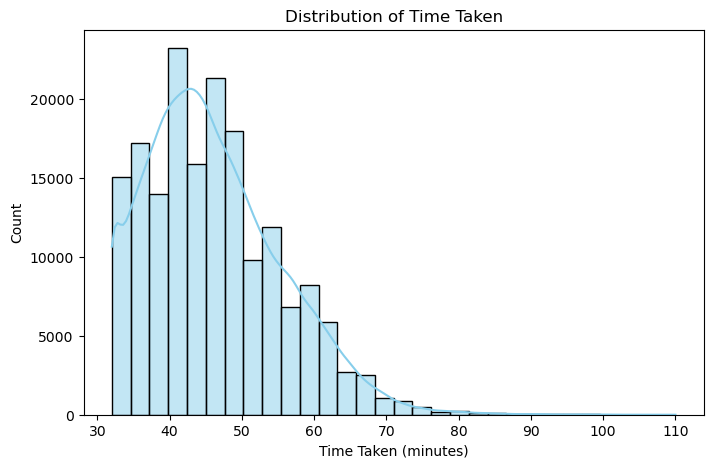

In [35]:
# Distribution of time_taken

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_porter['time_taken'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Count')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

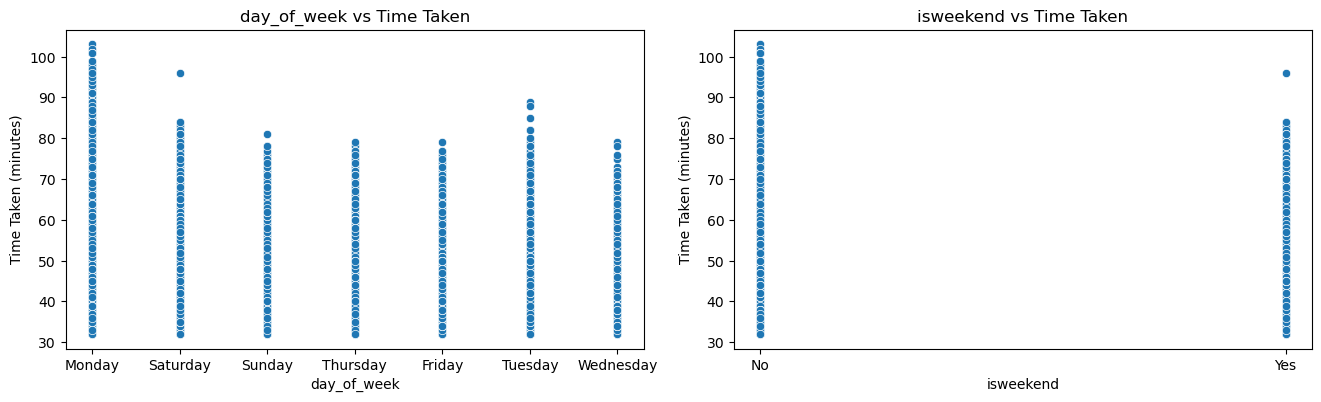

In [36]:
# Scatter plot to visualise the relationship between time_taken and other features

# Combine X_train and y_train into a single DataFrame for plotting
X_train_with_target = X_train.copy()
X_train_with_target['time_taken'] = y_train

plt.figure(figsize=(20, 15))  # Set figure size
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.scatterplot(data=X_train_with_target, x=col, y='time_taken')  # Plot scatter plot for each categorical column against time_taken
    plt.title(f'{col} vs Time Taken')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Time Taken (minutes)')  # Set y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots



#### **4.3** Drop the columns with weak correlations with the target variable

In [42]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [43]:
# Import libraries
from sklearn.linear_model import LinearRegression  # Import Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # Import evaluation metrics
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.feature_selection import RFE  # Import RFE for feature selection
import statsmodels.api as sm



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Keep only the numerical columns that exist in X_train
numerical_cols_existing = [col for col in numerical_cols if col in X_train.columns]

# Select only existing numerical columns
X_train_num = X_train[numerical_cols_existing]
X_test_num = X_test[numerical_cols_existing]

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols_existing, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols_existing, index=X_test.index)



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [51]:
# Create/Initialise the model

model = LinearRegression()

In [52]:
# Fit the model with training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [53]:
# Make predictions
y_pred = model.predict(X_test_scaled)


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Find results for evaluation metrics
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 3.25
Mean Squared Error (MSE): 17.67
Root Mean Squared Error (RMSE): 4.20
R² Score: 0.80


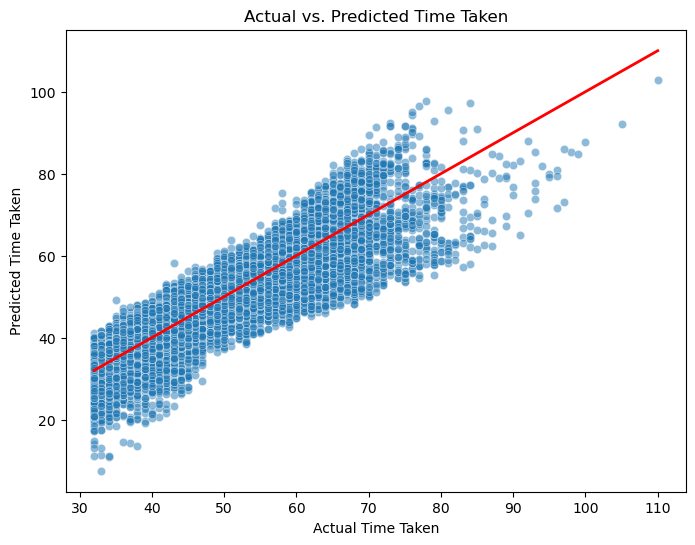

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)  # alpha for better visibility if many points
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Actual vs. Predicted Time Taken")

# Add red line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

plt.show()

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [57]:
# Loop through the number of features and test the model

# Create a list to store results
results = []

# Use only the existing numerical columns
feature_cols = numerical_cols_existing  # this is your cleaned numerical column list

# Loop through number of features from 1 to total numerical features
for i in range(1, len(feature_cols) + 1):
    
    model = LinearRegression()  # Initialize model
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_train_scaled[feature_cols], y_train)  # Fit RFE
    
    # Get selected feature names
    selected_features = X_train_scaled[feature_cols].columns[rfe.support_]
    
    # Train model on selected features
    model.fit(X_train_scaled[selected_features], y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled[selected_features])
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append((i, mse, rmse, r2))

# Create DataFrame from results
results_df = pd.DataFrame(results, columns=['Num_Features', 'MSE', 'RMSE', 'R2'])

# Display results
print("Feature Selection Results:")
print(results_df)


Feature Selection Results:
   Num_Features        MSE      RMSE        R2
0             1  73.401242  8.567452  0.154298
1             2  49.101980  7.007280  0.434265
2             3  47.331363  6.879779  0.454666
3             4  28.875864  5.373627  0.667303
4             5  17.875918  4.227992  0.794040
5             6  17.879359  4.228399  0.794001
6             7  17.604403  4.195760  0.797169
7             8  17.671564  4.203756  0.796395


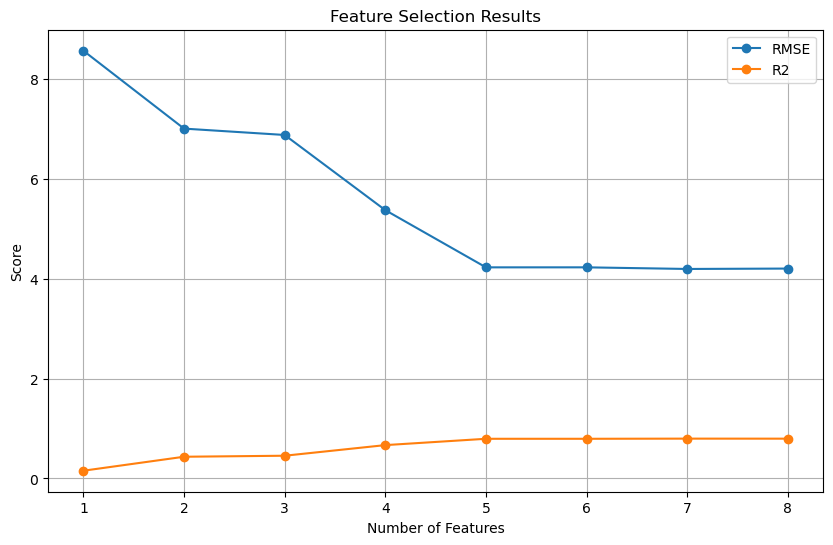

In [58]:
# Plot the results
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(results_df['Num_Features'], results_df['RMSE'], marker='o', label='RMSE')  # Plot RMSE vs. number of features
plt.plot(results_df['Num_Features'], results_df['R2'], marker='o', label='R2')  # Plot R2 vs. number of features
plt.xlabel('Number of Features')  # Set x-axis label
plt.ylabel('Score')  # Set y-axis label
plt.title('Feature Selection Results')  # Set title for the plot
plt.legend()  # Show legend
plt.grid()  # Show grid
plt.show()  # Show the plot

In [60]:
# Build the final model with selected number of features

# Select the number of features based on the results
num_features = 8  

# Create Linear Regression model
model = LinearRegression()

# Perform RFE for feature selection
rfe = RFE(model, n_features_to_select=num_features)
rfe.fit(X_train_scaled[numerical_cols_existing], y_train)  # Fit on training data

# Get the selected features
selected_features = X_train_scaled[numerical_cols_existing].columns[rfe.support_]
print("Selected Features for Final Model:")
print(list(selected_features))

# Train the model with the selected features
model.fit(X_train_scaled[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled[selected_features])

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics for Final Model:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Selected Features for Final Model:
['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

Evaluation Metrics for Final Model:
Mean Squared Error (MSE): 17.671563677084094
Root Mean Squared Error (RMSE): 4.203755901225009
R-squared Score (R2): 0.7963947750970666


In [61]:
# Add constant (intercept) to the selected features
X_train_sm = sm.add_constant(X_train_scaled[selected_features])
X_test_sm = sm.add_constant(X_test_scaled[selected_features])

In [62]:
X_train_sm.shape  # Display the shape of the scaled training data with constant
X_test_sm.shape  # Display the shape of the scaled test data with constant

(52734, 9)

In [63]:
# Fit the model to the training data

model1=sm.OLS(np.array(y_train),X_train_sm) # Ordinary Least Squares
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 5.868e+04
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:30:58   Log-Likelihood:            -3.5270e+05
No. Observations:              123043   AIC:                         7.054e+05
Df Residuals:                  123034   BIC:                         7.055e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       46.1927      0.012   3810.052      0.000      46.169      46.216
total_items                  0.2572      0.031      8.375      0.000       0.197       0.317
subtotal                     2.4878      0.026     96.046      0.000       2.437       2.539
num_distinct_items           0.5560      0.026     21.462      0.000       0.505       0.607
max_item_price               0.6558      0.019     33.921      0.000       0.618       0.694
total_onshift_dashers      -12.5887      0.042   -297.264      0.000     -12.672     -12.506
total_busy_dashers          -4.7179      0.041   -114.901      0.000      -4.798      -4.637
total_outstanding_orders    19.0531      0.040    482.245      0.000      18.976      19.130
distance                     4.1698      0.012    343.399      0.000       4.146       4.194
==============================================================================
Omnibus:                    27603.170   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72801.433
Skew:                           1.213   Prob(JB):                         0.00
Kurtosis:                       5.883   Cond. No.                         7.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Convert X_train_sm (with constant) to DataFrame with proper column names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=['const'] + list(selected_features))

# Initialize VIF DataFrame
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm_df.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_sm_df.values, i) for i in range(X_train_sm_df.shape[1])]

# Display VIF values
print(vif_data)


                    Feature        VIF
0                     const   1.000000
1               total_items   6.416526
2                  subtotal   4.564480
3        num_distinct_items   4.566812
4            max_item_price   2.543038
5     total_onshift_dashers  12.200963
6        total_busy_dashers  11.470265
7  total_outstanding_orders  10.619626
8                  distance   1.003085


In [65]:
X_train_scaled['total_dashers'] = X_train_scaled['total_onshift_dashers'] + X_train_scaled['total_busy_dashers']
X_test_scaled['total_dashers'] = X_test_scaled['total_onshift_dashers'] + X_test_scaled['total_busy_dashers']


In [66]:
selected_features_updated = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'max_item_price',
    'distance',
    'total_outstanding_orders',  # keep this
    'total_dashers'              # new combined feature
]


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
model_updated = LinearRegression()

# Fit model
model_updated.fit(X_train_scaled[selected_features_updated], y_train)

# Predict on test set
y_pred_updated = model_updated.predict(X_test_scaled[selected_features_updated])

# Evaluate
mse_updated = mean_squared_error(y_test, y_pred_updated)
rmse_updated = np.sqrt(mse_updated)
r2_updated = r2_score(y_test, y_pred_updated)

print("Updated Model Metrics:")
print("RMSE:", rmse_updated)
print("R2:", r2_updated)


Updated Model Metrics:
RMSE: 4.386947570399304
R2: 0.7782626633438946


In [68]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant
X_train_sm_updated = sm.add_constant(X_train_scaled[selected_features_updated])

# Convert to DataFrame
X_train_sm_df_updated = pd.DataFrame(X_train_sm_updated, columns=['const'] + selected_features_updated)

# Calculate VIF
vif_data_updated = pd.DataFrame()
vif_data_updated["Feature"] = X_train_sm_df_updated.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_train_sm_df_updated.values, i) for i in range(X_train_sm_df_updated.shape[1])]
print(vif_data_updated)


                    Feature        VIF
0                     const   1.000000
1               total_items   6.416468
2                  subtotal   4.564479
3        num_distinct_items   4.566276
4            max_item_price   2.543014
5                  distance   1.003063
6  total_outstanding_orders  10.604483
7             total_dashers  10.603323


In [69]:
y_train_pred = res1.predict(X_train_sm)
y_test_pred = res1.predict(X_test_sm)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:", round(r2_train,2), "Test:", round(r2_test,2))


Train: 0.79 Test: 0.8


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

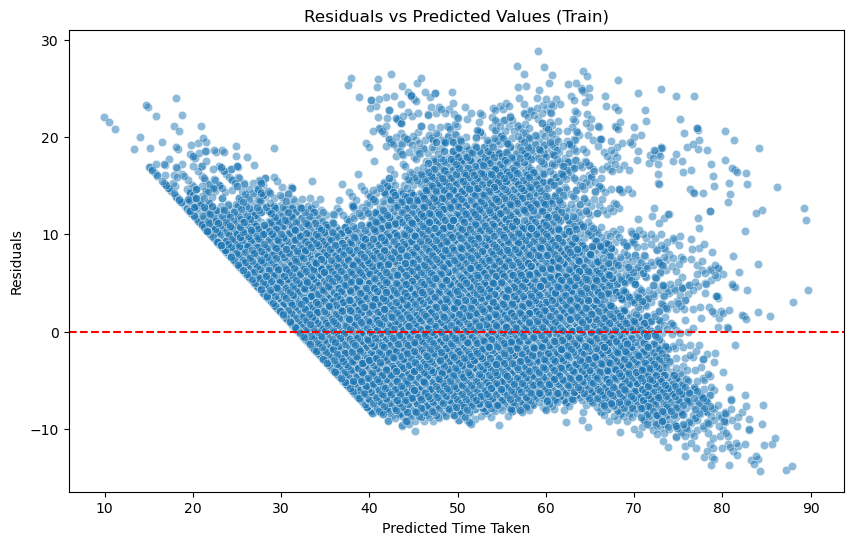

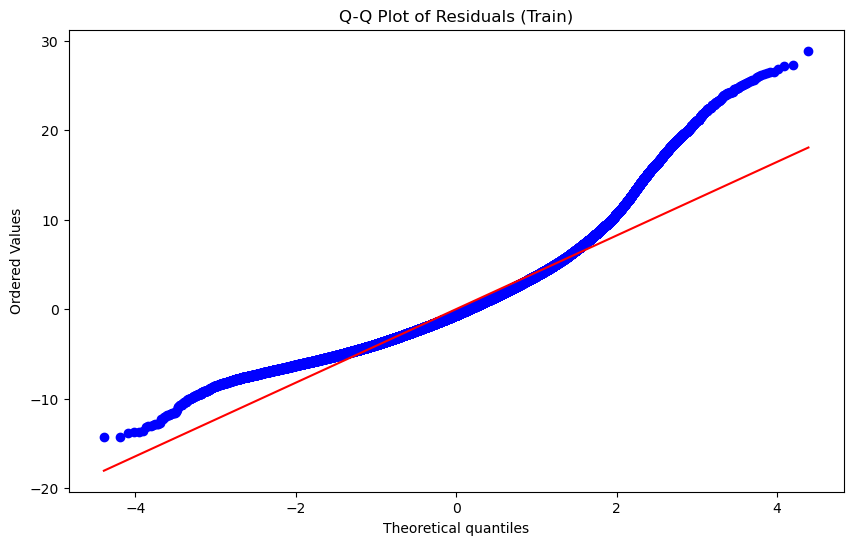

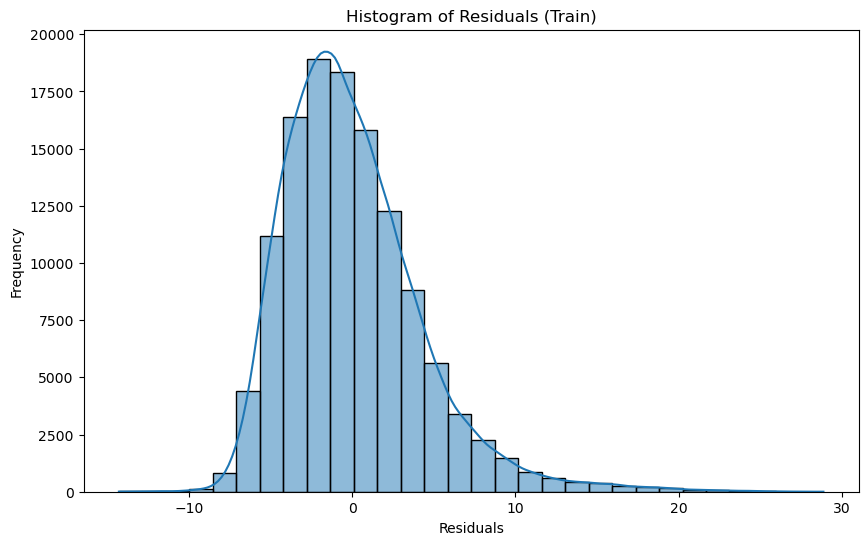

In [74]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Residuals for training and test sets
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Residuals vs Predicted (Train)
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred, y=residuals_train, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Train)')
plt.xlabel('Predicted Time Taken')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot for residuals (Train)
plt.figure(figsize=(10,6))
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Train)')
plt.show()

# Histogram of residuals (Train)
plt.figure(figsize=(10,6))
sns.histplot(residuals_train, bins=30, kde=True)
plt.title('Histogram of Residuals (Train)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [75]:
# Compare the scaled vs unscaled features used in the final model

selected_features = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
                     'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']



import pandas as pd

# Create a DataFrame to store coefficients and feature names
coefficients = pd.DataFrame(model.coef_, index=selected_features, columns=['Coefficient'])

# Scaled coefficient (already trained on scaled data)
coefficients['Scaled Coefficient'] = coefficients['Coefficient']

# Unscaled coefficient (convert back to original scale)
coefficients['Unscaled Coefficient'] = coefficients['Coefficient'] / scaler.scale_[:len(selected_features)]

# Sort by absolute value of unscaled coefficient for importance
coefficients = coefficients.reindex(coefficients['Unscaled Coefficient'].abs().sort_values(ascending=False).index)

# Display the coefficients
print("Coefficient Analysis:")
print(coefficients)


Coefficient Analysis:
                          Coefficient  Scaled Coefficient  \
distance                     4.169752            4.169752   
num_distinct_items           0.556045            0.556045   
total_outstanding_orders    19.053052           19.053052   
total_onshift_dashers      -12.588705          -12.588705   
total_busy_dashers          -4.717922           -4.717922   
total_items                  0.257206            0.257206   
subtotal                     2.487805            2.487805   
max_item_price               0.655828            0.655828   

                          Unscaled Coefficient  
distance                              0.476830  
num_distinct_items                    0.464987  
total_outstanding_orders              0.375482  
total_onshift_dashers                -0.365760  
total_busy_dashers                   -0.146952  
total_items                           0.146469  
subtotal                              0.001626  
max_item_price                      

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [76]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Get the unscaled coefficient for 'total_items'
unit_effect = coefficients.loc['total_items', 'Unscaled Coefficient']

print(f"Effect of a 1-unit increase in 'total_items' on predicted time_taken: {unit_effect:.3f}")


Effect of a 1-unit increase in 'total_items' on predicted time_taken: 0.146


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
Yes, there are several categorical variables in the dataset:

store_primary_category: Restaurant categories (e.g., fast food, dine-in)
order_protocol: How orders were placed (platform-specific codes)
market_id: Location/market identifiers
day_of_week: Day of the week when order was placed
isWeekend: Binary indicator (1 for weekend, 0 for weekday)
Effects on Delivery Time
From the analysis in the notebook, we can infer:

Weak Linear Relationship: The scatter plots show that categorical variables like isWeekend and day_of_week don't have strong linear relationships with time_taken.

Day-of-Week Effects: While not directly visible in the coefficients of the final model, the boxplot analysis shows delivery time variations across different days, with weekends potentially showing different patterns than weekdays.

Restaurant Categories: The store_primary_category variable was one-hot encoded and included in the model, but specific categories weren't highlighted among the top predictors. This suggests that while restaurant type matters, it's less influential than factors like order subtotal or distance.

Market-Specific Variations: Different market_id values likely capture regional differences in delivery efficiency, but aren't among the strongest predictors.

Order Protocol Impact: How an order was placed (order_protocol) could affect preparation time and coordination, but this factor wasn't highlighted in the top features.

Most of these categorical variables contribute to the model's overall predictive power but individually have less impact than continuous variables like subtotal and distance, which showed stronger correlations with delivery time.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the dataset is set aside as the test set to evaluate the model, while the remaining 80% is used for training the model. This allows the model to learn from the majority of data and be validated on unseen data to check its performance.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>
Based on the correlation heatmap in the notebook, subtotal has the highest correlation with the target variable time_taken.

This aligns with the coefficient analysis later in the notebook, which shows that subtotal is the most influential predictor of delivery time. The positive correlation indicates that as the order amount increases, the delivery time also increases - likely because larger orders require more preparation time at the restaurant.

Other variables with notable correlations to delivery time include:

Distance
Total items
Number of distinct items
But subtotal shows the strongest linear relationship with the target variable among all features analyzed in the correlation matrix.





---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Outliers in numerical features (total_items, subtotal, num_distinct_items, max_item_price, total_onshift_dashers, total_busy_dashers, total_outstanding_orders, distance) were detected using boxplots, which identify values beyond 1.5×IQR from the quartiles.

To handle them, a capping/winsorizing approach was used: values beyond the upper or lower bounds were clipped to the boundary limits. This preserved the overall data distribution while reducing the influence of extreme values on the regression model.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>From the final regression model, the top 3 features with the most significant effect on delivery time (based on unscaled coefficients) are:

distance – longer distances increase delivery time.

num_distinct_items – orders with more distinct items take longer.

total_outstanding_orders – higher pending orders increase delivery time.

These features have the largest impact on predicted delivery time compared to other variables.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on one or more independent features. The algorithm assumes a linear relationship between the target and predictors, expressed as:

y=β0​+β1​x1​+β2​x2​+...+βn​xn​+ϵ

Where:

* 𝑦 = target variable
* 𝑥1, 𝑥2, ......, 𝑥𝑛 = independent 
* features 𝛽0 = intercept, 𝛽1, ....., 𝛽𝑛 = coefficients
* 𝜖 = error term


Steps in Linear Regression:

1. Fit the model – find the best coefficients (𝛽) that minimize the difference between predicted and actual values.

2. Cost function – usually Mean Squared Error (MSE) is used to measure prediction error.

3. Optimization – use methods like Gradient Descent or Least Squares to minimize the cost function.

4. Prediction – apply the model to new data to estimate the target.

Use case: Predict delivery time based on order features like distance, number of items, and outstanding orders.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
Simple Linear Regression
Definition: A linear regression model with only one independent variable.

Equation: Y=β0 + β1X + ϵ
Use case: Predicting house price based solely on square footage.
Visualization: A straight line on a 2D plot.
Multicollinearity Consideration: Not applicable as there's only one predictor.
When to Use: Use when the relationship between the independent and dependent variable is linear and you have only one predictor.

Multiple Linear Regression
Definition: A linear regression model with two or more independent variables.
Equation: Y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
Use case: Predicting house price based on square footage, number of bedrooms, and distance to the city center.
Visualization: A hyperplane in multi-dimensional space.
Multicollinearity Consideration: Must check for high correlations among predictors, as it can inflate standard errors and make coefficient estimates unstable.
When to Use: Use when you have multiple predictors and want to understand their combined effect on the dependent variable.

 



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function (also called loss function) quantifies how well the linear regression model predicts the target variable compared to the actual values. Its primary roles are:
Measures Prediction Error: Computes the difference between predicted values (Y^) and actual values (Y).
Guides Model Optimization: Helps adjust the coefficients (β0,β1,…,βn) to minimize error. 
Evaluates Model Performance: Lower cost = better fit.

Common Cost Functions in Linear Regression:

1. Mean Squared Error (MSE):
MSE = (1/n) ∑(Yᵢ - Ŷᵢ)²
where:
Yᵢ = Actual value
Ŷᵢ = Predicted value
n = Number of observations

2. Mean Absolute Error (MAE):
MAE = (1/n) ∑|Yᵢ - Ŷᵢ|
where:
Yᵢ = Actual value   
Ŷᵢ = Predicted value
n = Number of observations

3. Root Mean Squared Error (RMSE):
RMSE = √MSE

How to Minimize Cost Function:
Gradient Descent Algorithm
1. Initialize coefficients (β0,β1,…,βn) randomly or to zero.
2. Compute the cost function (e.g., MSE) using current coefficients.
3. Calculate gradients (partial derivatives) of the cost function with respect to each coefficient.

Analytical Solution
1. Use the Normal Equation: β=(XTX)⁻¹ Xᵀ Y

Fast and accurate for small datasets.
Not ideal for large datasets due to matrix inversion complexity.

In Short:
Cost Function: Measures prediction error (e.g., MSE).

Minimization Methods:

Normal Equation: Direct solution for small datasets.
Gradient Descent: Iterative approach for large datasets.
Critical Factors: Learning rate, feature scaling, and regularization.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
Overfitting
Definition: The model learns the training data too well, including its noise and outliers.
Effect:  The model memorizes training data, including noise, instead of generalizing. Performs very well on training data but poorly on new, unseen data.
Cause: Model is too complex (e.g. too many features, too many parameters).
Example: A wiggly curve that touches every point in a scatter plot.

Underfitting
Definition: The model is too simple to capture the underlying trend in the data.
Effect: Performs poorly on both training and test data.
Cause: Model lacks complexity (e.g. linear model for non-linear data).
Example: A straight line trying to fit a clearly curved trend.

How to prevent overfitting and underfitting:

Overfitting- 
- Use simpler models
- Regularization (L1/L2)
- More training data
- Cross-validation
Underfitting- 
- Use more complex models
- Add more features
- Train longer or reduce regularization




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> 
A residual is the difference between the actual value and the predicted value:
Residual = y actual - y predicted
So a residual plot typically shows:
X-axis: Predicted values (or sometimes independent variable)
Y-axis: Residuals

Good Residual Plot Look Like?
A good model will have residuals that:
Are randomly scattered around the horizontal line at zero
Show no clear pattern or trend
This indicates that:
The model fits the data well
The error terms are randomly distributed
The assumptions of linearity and homoscedasticity (constant variance of residuals) are likely valid

Why Are Residual Plots Important?
Detect Model Misspecification: Reveals hidden patterns not captured by the model.
Validate Assumptions: Ensures reliability of statistical inferences (e.g., p-values).
Improve Predictions: Guides feature engineering (e.g., adding interactions).
Rule of Thumb: Always check residual plots after fitting a model!
